In [1]:
# use model as ViViT model or slowfast model
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.CustomDataset import DatasetForVideo
from src.CustomDataset import DatasetFor0D
from src.CustomDataset import MultiModalDataset
from torch.utils.data import DataLoader

In [3]:
new_shot_df = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List_extend.csv")
new_shot_df.head()

,shot,year,tftsrt,tipminf,tTQend,dt,frame_startup,frame_cutoff,frame_tTQend,frame_tipminf
0,21273,2018,2.996,5.535,5.514,0.021,21,1165,1160,1164
1,21274,2018,2.996,10.056,10.038,0.018,21,2104,2100,2103
2,21310,2018,1.500,5.368,5.342,0.026,21,1131,1125,1130
3,21315,2018,1.500,7.804,7.782,0.022,21,1636,1631,1635
4,21317,2018,1.500,9.460,9.438,0.022,21,1980,1975,1979


In [6]:
ts_df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")
print("# of shot : ", len(np.unique(ts_df.shot.values)))

# of shot :  969


100%|██████████| 2272/2272 [02:07<00:00, 17.80it/s]


time :  2293
prob :  2293
thermal quench :  10.038
current quench:  10.056


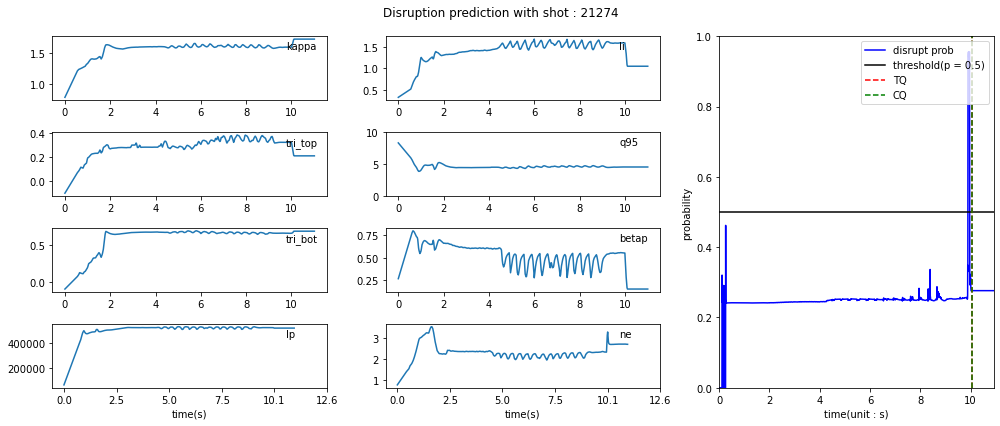

In [4]:
from src.models.ViViT import ViViT
import os

model = ViViT(
    image_size = 128,
    patch_size = 16,
    n_classes = 2,
    n_frames = 21,
    dim = 64,
    depth = 4,
    n_heads = 8,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:" + str(3)
else:
    device = 'cpu'

model.to(device)

model.load_state_dict(torch.load("./weights/ViViT_clip_21_dist_0_best.pt"))

from src.utils.utility import generate_prob_curve, video2tensor

shot_num = 21274

time_x, prob_list = generate_prob_curve(
    file_path = "./dataset/test-shot",
    model = model, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png",
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    ts_data_dir = "./dataset/KSTAR_Disruption_ts_data_extend.csv",
    shot_num = shot_num,
    clip_len = 21,
    dist_frame = 0,
)

100%|██████████| 2273/2273 [02:05<00:00, 18.10it/s]


time :  2293
prob :  2293
thermal quench :  10.038
current quench:  10.056


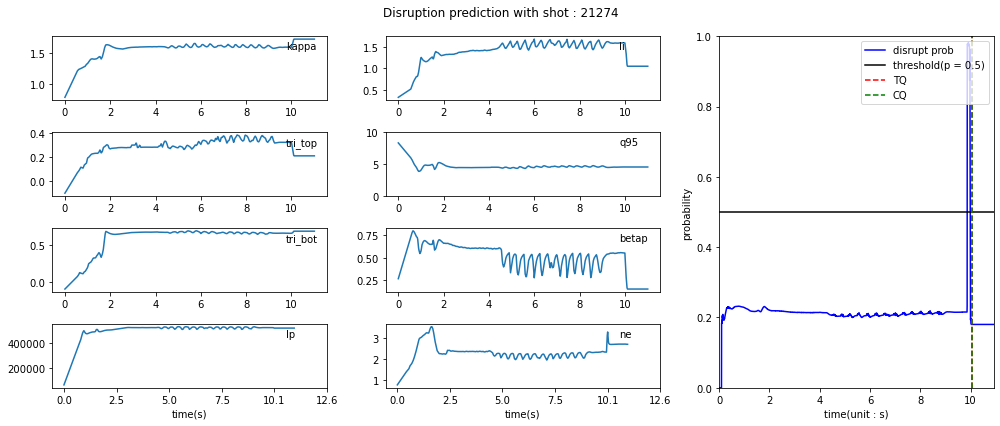

In [9]:
from src.models.slowfast import SlowFast
from src.models.resnet import Bottleneck3D

model = SlowFast(
        input_shape = (3, 20, 224, 224),
        block = Bottleneck3D,
        layers = [1,2,2,1],
        alpha = 4,
        tau_fast = 1,
        mlp_hidden = 64,
        num_classes = 2,
        device = device
)

model.to(device)
model.load_state_dict(torch.load("./weights/slowfast_clip_21_dist_0_best.pt"))

shot_num = 21274

time_x, prob_list = generate_prob_curve(
    file_path = "./dataset/test-shot",
    model = model, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png",
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    ts_data_dir = "./dataset/KSTAR_Disruption_ts_data_extend.csv",
    shot_num = shot_num,
    clip_len = 20,
    dist_frame = 0,
)

100%|██████████| 2272/2272 [02:21<00:00, 16.09it/s]


time :  2293
prob :  2293
thermal quench :  10.038
current quench:  10.056


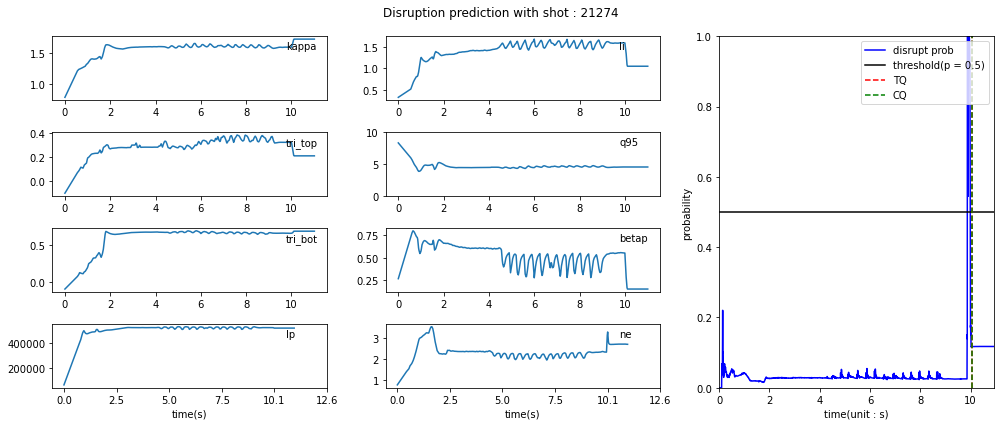

In [10]:
from src.models.R2Plus1D import  R2Plus1DClassifier

model = R2Plus1DClassifier(
        input_size  = (3, 21, 128, 128),
        num_classes = 2, 
        layer_sizes = [1,2,2,1], 
        pretrained = False, 
        alpha = 0.01
    )

model.to(device)
model.load_state_dict(torch.load("./weights/R2Plus1D_clip_21_dist_0_best.pt"))

shot_num = 21274

time_x, prob_list = generate_prob_curve(
    file_path = "./dataset/test-shot",
    model = model, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png",
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    ts_data_dir = "./dataset/KSTAR_Disruption_ts_data_extend.csv",
    shot_num = shot_num,
    clip_len = 21,
    dist_frame = 0,
)

Distance = 3 frame (about 15ms) for prediction

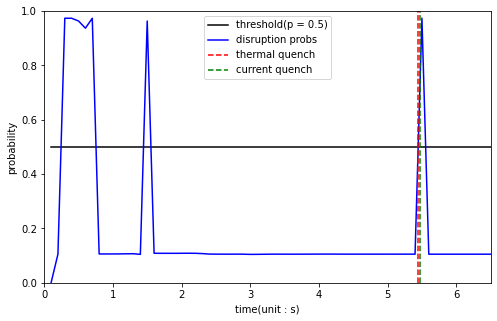

In [6]:
from src.models.ViViT import ViViT
import os

model = ViViT(
    image_size = 128,
    patch_size = 32,
    n_classes = 2,
    n_frames = 21,
    dim = 64,
    depth = 4,
    n_heads = 8,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:" + str(3)
else:
    device = 'cpu'
    
model.to(device)

model.load_state_dict(torch.load("./weights/ViViT_clip_21_dist_3_best.pt"))

from src.utils.utility import generate_prob_curve, video2tensor

# shot_num = 21747
shot_num = 21310

video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)
dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)
prob_list = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 64, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 21,
    dist_frame = 3,
    use_continuous_frame = False
)

Now, Distance = 5 frame (about 25ms) for prediction

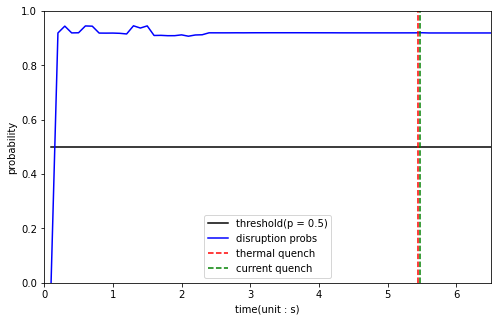

In [10]:
from src.models.ViViT import ViViT
import os

model = ViViT(
    image_size = 128,
    patch_size = 32,
    n_classes = 2,
    n_frames = 21,
    dim = 64,
    depth = 4,
    n_heads = 8,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

model.to(device)

model.load_state_dict(torch.load("./weights/ViViT_clip_21_dist_5_best.pt"))

from src.utils.utility import generate_prob_curve, video2tensor

# shot_num = 21747
shot_num = 21310

video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)
dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)
prob_list = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 64, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 21,
    dist_frame = 5,
    use_continuous_frame = False
)

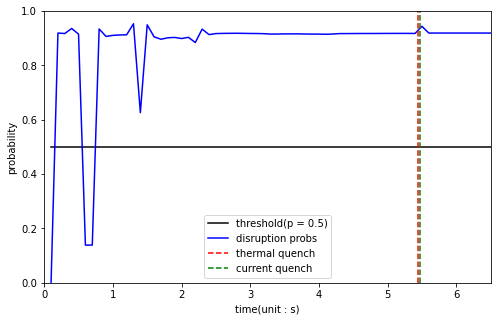

In [11]:
from src.models.ViViT import ViViT
import os

model = ViViT(
    image_size = 128,
    patch_size = 32,
    n_classes = 2,
    n_frames = 21,
    dim = 64,
    depth = 4,
    n_heads = 8,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

model.to(device)

model.load_state_dict(torch.load("./weights/ViViT_clip_21_dist_5_best.pt"))

from src.utils.utility import generate_prob_curve, video2tensor

# shot_num = 21747
shot_num = 21310

video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)
dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)
prob_list = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 64, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 21,
    dist_frame = 5,
    use_continuous_frame = False
)

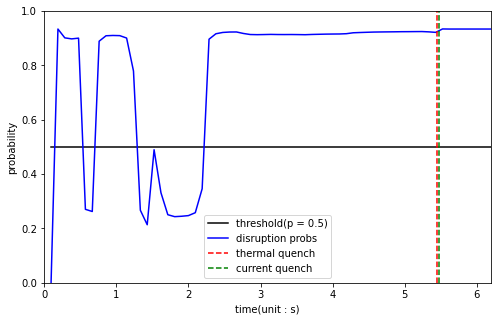

In [9]:
from src.models.slowfast import SlowFast
from src.models.resnet import Bottleneck3D

shot_num = 21310
video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)
dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)

model = SlowFast(
        input_shape = (3, 20, 224, 224),
        block = Bottleneck3D,
        layers = [1,2,2,1],
        alpha = 4,
        tau_fast = 1,
        mlp_hidden = 64,
        num_classes = 2,
        device = device
)

model.to(device)
model.load_state_dict(torch.load("./weights/slowfast_clip_21_dist_5_best.pt"))

dataset = video2tensor(video_dir, 3, 20, 128, 256,256, False)
prob_list = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 64, 
    device = device, 
    save_dir = "./results/slowfast_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 20,
    dist_frame = 5,
    use_continuous_frame = False
)

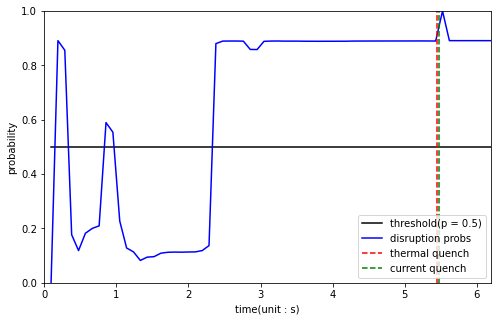

In [12]:
from src.models.slowfast import SlowFast
from src.models.resnet import Bottleneck3D

shot_num = 21310
video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)
dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)

model = SlowFast(
        input_shape = (3, 20, 224, 224),
        block = Bottleneck3D,
        layers = [1,2,2,1],
        alpha = 4,
        tau_fast = 1,
        mlp_hidden = 64,
        num_classes = 2,
        device = device
)

model.to(device)
model.load_state_dict(torch.load("./weights/slowfast_clip_21_dist_5_best.pt"))

dataset = video2tensor(video_dir, 3, 20, 128, 256,256, False)
prob_list = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 64, 
    device = device, 
    save_dir = "./results/slowfast_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 20,
    dist_frame = 5,
    use_continuous_frame = False
)

Experiment Result for different algorithm for ViViT - Video data

<AxesSubplot:xlabel='Loss', ylabel='F1_score'>

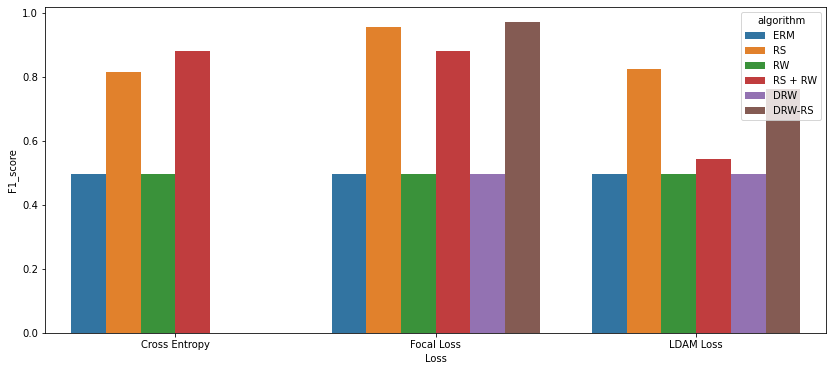

In [13]:
# plot as a bar graph
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

algorithm_list = ['ERM', 'RS', 'RW', 'RS + RW'] + ['ERM', 'RS', 'RW', 'RS + RW', 'DRW', 'DRW-RS'] + ['ERM', 'RS', 'RW', 'RS + RW', 'DRW', 'DRW-RS']
loss_list = ['Cross Entropy'] * 4 + ['Focal Loss'] * 6 + ['LDAM Loss'] * 6
f1_list = [0.496, 0.813, 0.496, 0.880] + [0.496, 0.956, 0.496, 0.88, 0.496, 0.97] + [0.496, 0.824, 0.496, 0.543, 0.496, 0.76]

df_exp_algorithm = pd.DataFrame({
    "Loss" : loss_list,
    "F1_score" : f1_list,
    "algorithm" : algorithm_list
})

plt.figure(figsize = (14,6))
sns.barplot(data = df_exp_algorithm, x = 'Loss', y = 'F1_score', hue = 'algorithm')

Experiment Result for different algorithm for 1D CNN - LSTM - 0D data

<AxesSubplot:xlabel='Loss', ylabel='F1_score'>

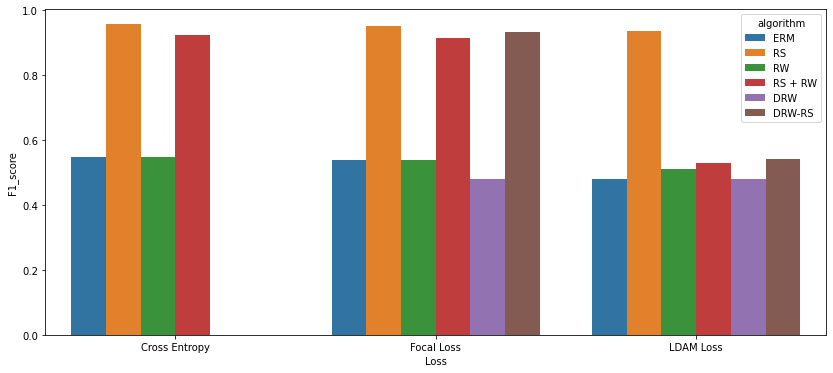

In [28]:
# Conv LSTM model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

algorithm_list = ['ERM', 'RS', 'RW', 'RS + RW'] + ['ERM', 'RS', 'RW', 'RS + RW', 'DRW', 'DRW-RS'] + ['ERM', 'RS', 'RW', 'RS + RW', 'DRW', 'DRW-RS']
loss_list = ['Cross Entropy'] * 4 + ['Focal Loss'] * 6 + ['LDAM Loss'] * 6
f1_list = [0.548, 0.957, 0.548, 0.924] + [0.538, 0.952, 0.538, 0.913, 0.479, 0.934] + [0.479, 0.935, 0.51, 0.529, 0.479, 0.543]

df_exp_algorithm = pd.DataFrame({
    "Loss" : loss_list,
    "F1_score" : f1_list,
    "algorithm" : algorithm_list
})

plt.figure(figsize = (14,6))
sns.barplot(data = df_exp_algorithm, x = 'Loss', y = 'F1_score', hue = 'algorithm')

Image sequence vs 0D data vs Probability Curve Plot

In [6]:
shot_num = 21310
df_0D = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")

In [7]:
ts_data_0D = df_0D[df_0D.shot == shot_num]
ts_data_0D.head()

,time,shot,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\bcentr,\nb11_pnb,\nb12_pnb,\nb13_pnb,\ne_inter01,\ne_tci01,\ne_tci02,\RC03,\VCM03,\WTOT_DLM03,\TS_CORE1:CORE1_TE,\TS_CORE2:CORE2_TE,\TS_CORE3:CORE3_TE,\TS_CORE4:CORE4_TE,\TS_CORE5:CORE5_TE,\TS_CORE6:CORE6_TE,\TS_CORE7:CORE7_TE,\TS_CORE8:CORE8_TE,\TS_CORE9:CORE9_TE,\TS_CORE10:CORE10_TE,\TS_CORE11:CORE11_TE,\TS_CORE12:CORE12_TE,\TS_CORE13:CORE13_TE,\TS_CORE14:CORE14_TE,\TS_EDGE1:EDGE1_TE,\TS_EDGE2:EDGE2_TE,\TS_EDGE3:EDGE3_TE,\TS_EDGE4:EDGE4_TE,\TS_EDGE5:EDGE5_TE,\TS_EDGE6:EDGE6_TE,\TS_EDGE7:EDGE7_TE,\TS_EDGE8:EDGE8_TE,\TS_EDGE9:EDGE9_TE,\TS_EDGE10:EDGE10_TE,\TS_EDGE11:EDGE11_TE,\TS_EDGE12:EDGE12_TE,\TS_EDGE13:EDGE13_TE,\TS_EDGE14:EDGE14_TE,\TS_EDGE15:EDGE15_TE,\TS_CORE1:CORE1_NE,\TS_CORE2:CORE2_NE,\TS_CORE3:CORE3_NE,\TS_CORE4:CORE4_NE,\TS_CORE5:CORE5_NE,\TS_CORE6:CORE6_NE,\TS_CORE7:CORE7_NE,\TS_CORE8:CORE8_NE,\TS_CORE9:CORE9_NE,\TS_CORE10:CORE10_NE,\TS_CORE11:CORE11_NE,\TS_CORE12:CORE12_NE,\TS_CORE13:CORE13_NE,\TS_CORE14:CORE14_NE,\TS_EDGE1:EDGE1_NE,\TS_EDGE2:EDGE2_NE,\TS_EDGE3:EDGE3_NE,\TS_EDGE4:EDGE4_NE,\TS_EDGE5:EDGE5_NE,\TS_EDGE6:EDGE6_NE,\TS_EDGE7:EDGE7_NE,\TS_EDGE8:EDGE8_NE,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,frame_idx
919,0.000000,21310,1061.016362,-108528.127480,0.855080,-0.048230,-0.048230,0.586226,0.408722,0.162515,-1.866473,NaN,NaN,NaN,-0.654833,0.318397,NaN,-101142.036125,-74296.960451,-29.765970,-56525.093174,144.800000,-1783.601534,-1942.904368,18978.494012,6268.703677,28779.480352,64969.193478,307.798152,-868.498634,3433.883814,-1572.497206,11618.542560,584.103287,NaN,-10604.811349,-2403.196682,3024.900192,909.203213,1516.401528,18918.522819,870.299492,20691.289852,-167.400687,48926.323824,0.0,0.0,NaN,NaN,-1.366323e+18,3.994855e+17,1.248520e+18,-8.454726e+17,8.284847e+18,-2.979797e+18,5.305456e+18,-2.126418e+18,1.642516e+18,3.273757e+18,7.827597e+17,4.232639e+18,-5.801088e+18,-1.759138e+19,NaN,-1.766276e+18,-8.178242e+16,2.586179e+18,4.265692e+18,-9.036449e+18,1.226222e+18,4.373478e+18,4.647083e+16,7.580386e+19,2.554893e+18,0.0,0.0,NaN,NaN,0
920,0.019048,21310,1029.587857,-115714.113862,0.866813,-0.044081,-0.044081,0.583825,0.414322,0.173383,-1.866473,NaN,NaN,NaN,-0.553027,0.330462,NaN,-108838.177147,-85844.183889,-26.800731,-53437.626822,142.552381,-1673.468114,-1815.018424,18326.837173,6048.132068,27441.347975,61977.727115,306.731583,-733.489179,3309.084643,-1458.402112,11167.340472,613.360255,NaN,-9943.591734,-2252.873034,2930.576368,889.012579,1485.734799,18084.655040,834.604278,19741.271338,-152.505415,46657.713130,0.0,0.0,NaN,NaN,-1.028521e+18,5.093027e+17,1.268146e+18,-7.729360e+17,7.920634e+18,-2.744805e+18,5.078331e+18,-1.963996e+18,1.621359e+18,3.166066e+18,7.586622e+17,4.048234e+18,-5.436816e+18,-1.660220e+19,NaN,-1.657096e+18,5.307255e+16,2.484469e+18,4.089025e+18,-8.526622e+18,1.230963e+18,4.206163e+18,5.488603e+16,7.247240e+19,2.482517e+18,0.0,0.0,NaN,NaN,4
921,0.038095,21310,998.159351,-122900.100244,0.878547,-0.039933,-0.039933,0.581425,0.419922,0.184251,-1.866473,NaN,NaN,NaN,-0.451221,0.342527,NaN,-116534.318169,-97391.407326,-23.835492,-50350.160471,140.304762,-1563.334694,-1687.132480,17675.180334,5827.560460,26103.215598,58986.260753,305.665014,-598.479725,3184.285473,-1344.307017,10716.138385,642.617224,NaN,-9282.372119,-2102.549386,2836.252544,868.821945,1455.068070,17250.787261,798.909064,18791.252824,-137.610143,44389.102436,0.0,0.0,NaN,NaN,-6.907187e+17,6.191199e+17,1.287771e+18,-7.003994e+17,7.556421e+18,-2.509812e+18,4.851205e+18,-1.801575e+18,1.600202e+18,3.058375e+18,7.345647e+17,3.863828e+18,-5.072545e+18,-1.561302e+19,NaN,-1.547916e+18,1.879275e+17,2.382759e+18,3.912359e+18,-8.016796e+18,1.235705e+18,4.038848e+18,6.330122e+16,6.914094e+19,2.410140e+18,0.0,0.0,NaN,NaN,8
922,0.057143,21310,966.730845,-130086.086626,0.890280,-0.035785,-0.035785,0.579024,0.425522,0.195120,-1.866472,NaN,NaN,NaN,-0.349415,0.354591,NaN,

In [8]:
ts_data_0D.columns

Index(['time', 'shot', '\q95', '\ipmhd', '\kappa', '\tritop', '\tribot',
       '\betap', '\betan', '\li', '\bcentr', '\nb11_pnb', '\nb12_pnb',
       '\nb13_pnb', '\ne_inter01', '\ne_tci01', '\ne_tci02', '\RC03', '\VCM03',
       '\WTOT_DLM03', '\TS_CORE1:CORE1_TE', '\TS_CORE2:CORE2_TE',
       '\TS_CORE3:CORE3_TE', '\TS_CORE4:CORE4_TE', '\TS_CORE5:CORE5_TE',
       '\TS_CORE6:CORE6_TE', '\TS_CORE7:CORE7_TE', '\TS_CORE8:CORE8_TE',
       '\TS_CORE9:CORE9_TE', '\TS_CORE10:CORE10_TE', '\TS_CORE11:CORE11_TE',
       '\TS_CORE12:CORE12_TE', '\TS_CORE13:CORE13_TE', '\TS_CORE14:CORE14_TE',
       '\TS_EDGE1:EDGE1_TE', '\TS_EDGE2:EDGE2_TE', '\TS_EDGE3:EDGE3_TE',
       '\TS_EDGE4:EDGE4_TE', '\TS_EDGE5:EDGE5_TE', '\TS_EDGE6:EDGE6_TE',
       '\TS_EDGE7:EDGE7_TE', '\TS_EDGE8:EDGE8_TE', '\TS_EDGE9:EDGE9_TE',
       '\TS_EDGE10:EDGE10_TE', '\TS_EDGE11:EDGE11_TE', '\TS_EDGE12:EDGE12_TE',
       '\TS_EDGE13:EDGE13_TE', '\TS_EDGE14:EDGE14_TE', '\TS_EDGE15:EDGE15_TE',
       '\TS_CORE1:CORE1_NE', '\

In [10]:
t_TQend = new_shot_df[new_shot_df.shot==shot_num]['tTQend'].values[0]
t_ipminf = new_shot_df[new_shot_df.shot==shot_num]['tipminf'].values[0]

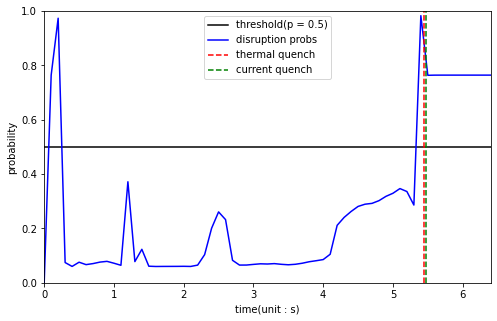

In [11]:
from src.models.ViViT import ViViT
import os

model = ViViT(
    image_size = 128,
    patch_size = 32,
    n_classes = 2,
    n_frames = 21,
    dim = 64,
    depth = 4,
    n_heads = 8,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:" + str(3)
else:
    device = 'cpu'

model.to(device)
model.load_state_dict(torch.load("./weights/ViViT_clip_21_dist_0_best.pt"))

from src.utils.utility import generate_prob_curve, video2tensor
video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)

dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)
time_x, prob_list = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 32, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 21,
    dist_frame = 0,
    use_continuous_frame = False
)

In [12]:
from src.models.ViViT import ViViT
import os

model = ViViT(
    image_size = 128,
    patch_size = 32,
    n_classes = 2,
    n_frames = 21,
    dim = 64,
    depth = 4,
    n_heads = 8,
    pool = "cls",
    in_channels = 3,
    d_head = 64,
    dropout = 0.25,
    embedd_dropout=0.25,
    scale_dim = 4
)

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:" + str(3)
else:
    device = 'cpu'

model.to(device)
model.load_state_dict(torch.load("./weights/ViViT_clip_21_dist_3_best.pt"))

from src.utils.utility import generate_prob_curve, video2tensor
video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)

dataset = video2tensor(video_dir, 3, 21, 128, 256,256, False)
time_x_dist3, prob_list_dist3 = generate_prob_curve(
    dataset, 
    model, 
    batch_size = 32, 
    device = device, 
    save_dir = "./results/ViViT_disruption_probs_curve.png", 
    shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List_extend.csv",
    shot_number = shot_num,
    clip_len = 21,
    dist_frame = 3,
    use_continuous_frame = False
)

RuntimeError: Error(s) in loading state_dict for ViViT:
	size mismatch for pos_embedding: copying a param with shape torch.Size([1, 21, 65, 64]) from checkpoint, the shape in current model is torch.Size([1, 21, 17, 64]).
	size mismatch for to_patch_embedding.1.weight: copying a param with shape torch.Size([64, 768]) from checkpoint, the shape in current model is torch.Size([64, 3072]).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col = ['\\ipmhd','\\kappa','\\betap','\\betan', '\\li', '\\bcentr', '\\q95', '\\tritop', '\\tribot', '\\WTOT_DLM03', '\\ne_inter01', '\\TS_CORE10:CORE10_TE']
ts_data_0D[col] = scaler.fit_transform(ts_data_0D[col].values)

/tmp/ipykernel_2550685/530925373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_0D[col] = scaler.fit_transform(ts_data_0D[col].values)
/home/jinsukim/miniconda3/envs/research-env/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
t = ts_data_0D.time
ip = ts_data_0D['\\ipmhd']
kappa = ts_data_0D['\\kappa']
betap = ts_data_0D['\\betap']
betan = ts_data_0D['\\betan']
li = ts_data_0D['\\li']
Bc = ts_data_0D['\\bcentr']
q95 = ts_data_0D['\\q95']
tritop = ts_data_0D['\\tritop']
tribot = ts_data_0D['\\tribot']
W_tot = ts_data_0D['\\WTOT_DLM03']
ne = ts_data_0D['\\ne_inter01']
te = ts_data_0D['\\TS_CORE10:CORE10_TE']

Text(0, 0.5, 'Probability')

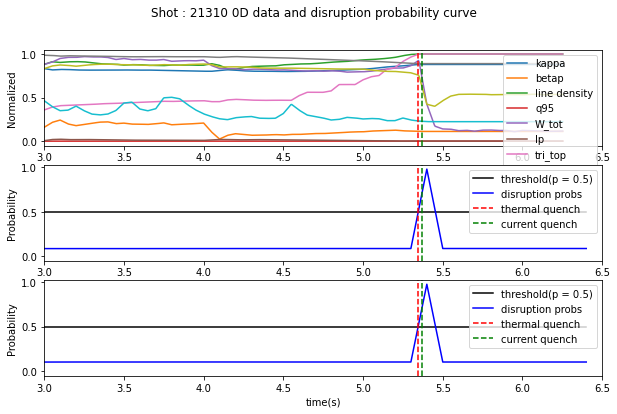

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,6), sharex = False)
fig.suptitle("Shot : {} 0D data and disruption probability curve".format(shot_num))
ax1.plot(t, kappa, label = "kappa")
ax1.plot(t, betap, label = 'betap')
ax1.plot(t, li, label = 'line density')
ax1.plot(t, q95, label = 'q95')
ax1.plot(t, W_tot, label = 'W_tot')
ax1.plot(t, ip, label = 'Ip')
ax1.plot(t, tritop, label = 'tri_top')
ax1.plot(t, tribot, label = 'tri_bot')
ax1.plot(t, ne, label = 'ne')
ax1.plot(t, te, label = 'Te')
ax1.set_xlim([3,6.5])
ax1.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", )
ax1.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax1.legend()
ax1.set_xlabel("time(s)")
ax1.set_ylabel("Normalized")

threshold_line = [0.5] * len(time_x)
ax2.plot(time_x, threshold_line, 'k', label = "threshold(p = 0.5)")
ax2.plot(time_x, prob_list, 'b-', label = "disruption probs")
ax2.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", label = "thermal quench")
ax2.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed", label = "current quench")
ax2.legend()
ax2.set_xlim([3,6.5])
ax2.set_xlabel("time(s)")
ax2.set_ylabel("Probability")

threshold_line = [0.5] * len(time_x)
ax3.plot(time_x_dist3, threshold_line, 'k', label = "threshold(p = 0.5)")
ax3.plot(time_x_dist3, prob_list_dist3, 'b-', label = "disruption probs")
ax3.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", label = "thermal quench")
ax3.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed", label = "current quench")
ax3.legend()
ax3.set_xlim([3,6.5])
ax3.set_xlabel("time(s)")
ax3.set_ylabel("Probability")

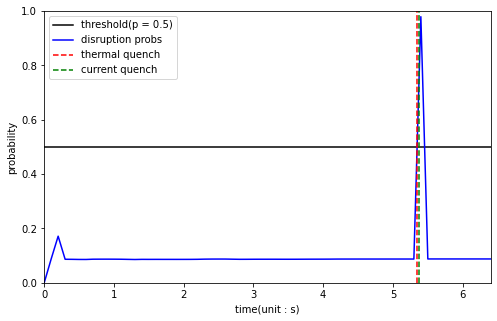

In [ ]:
threshold_line = [0.5] * len(time_x)

plt.figure(figsize = (8,5), facecolor = 'white')
plt.plot(time_x, threshold_line, 'k', label = "threshold(p = 0.5)")
plt.plot(time_x, prob_list, 'b-', label = "disruption probs")

plt.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", label = "thermal quench")
plt.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed", label = "current quench")

plt.ylabel("probability")
plt.xlabel("time(unit : s)")
plt.ylim([0,1])
plt.xlim([0,max(time_x)])
plt.legend()

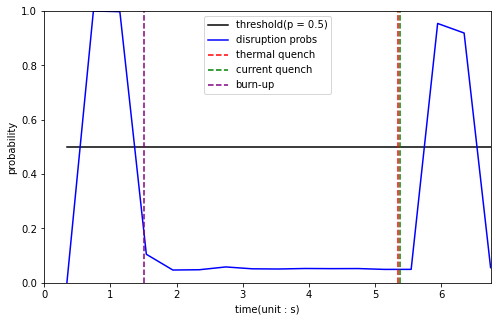

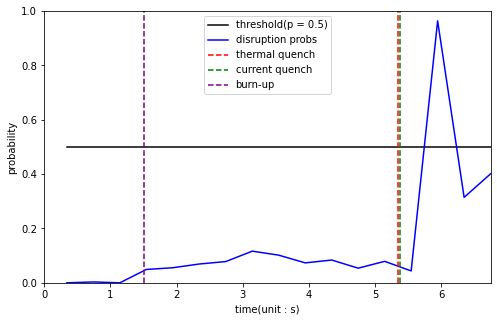

In [19]:
# For 0D data
from src.utils.utility import generate_prob_curve_from_0D
from src.models.ConvLSTM import ConvLSTM

ts_cols = [
    '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', '\\WTOT_DLM03'
]

seq_len = 21
dist = 3
dt = 1 / 210 * 4
col_len = len(ts_cols)

model = ConvLSTM(
    seq_len = seq_len,
    col_dim = col_len,
)

# for dist 1
model.load_state_dict(torch.load("./weights/ts_conv_lstm_clip_21_dist_1_best.pt"))

time_x_dist1, prob_list_dist1 = generate_prob_curve_from_0D(
    model, 
    batch_size = 16, 
    device = device, 
    save_dir = "./results/disruption_probs_curve.png",
    ts_data = "./dataset/KSTAR_Disruption_ts_data_extend.csv",
    ts_cols = ts_cols,
    shot_list_dir = './dataset/KSTAR_Disruption_Shot_List_extend.csv',
    shot = 21310,
    seq_len = seq_len,
    dist = dist,
    dt = dt
)

model.load_state_dict(torch.load("./weights/ts_conv_lstm_clip_21_dist_3_best.pt"))

time_x_dist3, prob_list_dist3 = generate_prob_curve_from_0D(
    model, 
    batch_size = 16, 
    device = device, 
    save_dir = "./results/disruption_probs_curve.png",
    ts_data = "./dataset/KSTAR_Disruption_ts_data_extend.csv",
    ts_cols = ts_cols,
    shot_list_dir = './dataset/KSTAR_Disruption_Shot_List_extend.csv',
    shot = 21310,
    seq_len = seq_len,
    dist = dist,
    dt = dt
)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col = ['\\ipmhd','\\kappa','\\betap','\\betan', '\\li', '\\bcentr', '\\q95', '\\tritop', '\\tribot', '\\WTOT_DLM03', '\\ne_inter01', '\\TS_CORE10:CORE10_TE']
ts_data_0D[col] = scaler.fit_transform(ts_data_0D[col].values)

/tmp/ipykernel_2701623/530925373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_0D[col] = scaler.fit_transform(ts_data_0D[col].values)


Text(0, 0.5, 'Probability')

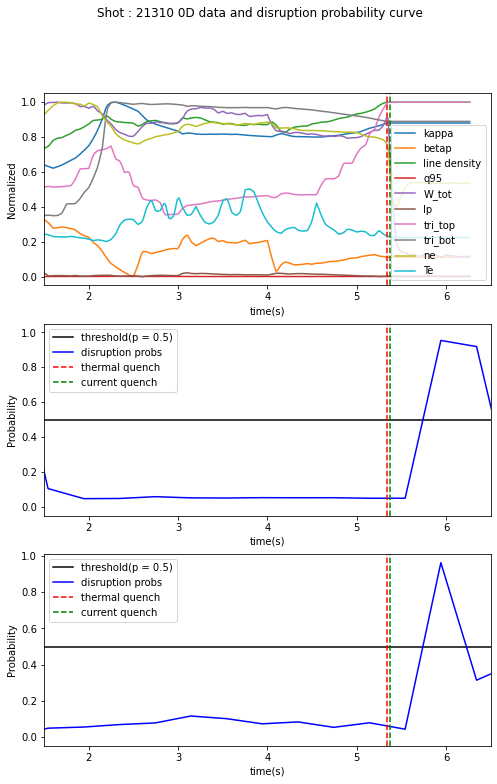

In [27]:
t = ts_data_0D.time
ip = ts_data_0D['\\ipmhd']
kappa = ts_data_0D['\\kappa']
betap = ts_data_0D['\\betap']
betan = ts_data_0D['\\betan']
li = ts_data_0D['\\li']
Bc = ts_data_0D['\\bcentr']
q95 = ts_data_0D['\\q95']
tritop = ts_data_0D['\\tritop']
tribot = ts_data_0D['\\tribot']
W_tot = ts_data_0D['\\WTOT_DLM03']
ne = ts_data_0D['\\ne_inter01']
te = ts_data_0D['\\TS_CORE10:CORE10_TE']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (8,12), sharex = False)
fig.suptitle("Shot : {} 0D data and disruption probability curve".format(shot_num))
ax1.plot(t, kappa, label = "kappa")
ax1.plot(t, betap, label = 'betap')
ax1.plot(t, li, label = 'line density')
ax1.plot(t, q95, label = 'q95')
ax1.plot(t, W_tot, label = 'W_tot')
ax1.plot(t, ip, label = 'Ip')
ax1.plot(t, tritop, label = 'tri_top')
ax1.plot(t, tribot, label = 'tri_bot')
ax1.plot(t, ne, label = 'ne')
ax1.plot(t, te, label = 'Te')
ax1.set_xlim([1.5,6.5])
ax1.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", )
ax1.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed")
ax1.legend()
ax1.set_xlabel("time(s)")
ax1.set_ylabel("Normalized")

threshold_line = [0.5] * len(time_x_dist1)
ax2.plot(time_x_dist1, threshold_line, 'k', label = "threshold(p = 0.5)")
ax2.plot(time_x_dist1, prob_list_dist1, 'b-', label = "disruption probs")
ax2.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", label = "thermal quench")
ax2.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed", label = "current quench")
ax2.legend()
ax2.set_xlim([1.5,6.5])
ax2.set_xlabel("time(s)")
ax2.set_ylabel("Probability")

threshold_line = [0.5] * len(time_x_dist3)
ax3.plot(time_x_dist3, threshold_line, 'k', label = "threshold(p = 0.5)")
ax3.plot(time_x_dist3, prob_list_dist3, 'b-', label = "disruption probs")
ax3.axvline(x = t_TQend, ymin = 0, ymax = 1, color = "red", linestyle = "dashed", label = "thermal quench")
ax3.axvline(x = t_ipminf, ymin = 0, ymax = 1, color = "green", linestyle = "dashed", label = "current quench")
ax3.legend()
ax3.set_xlim([1.5,6.5])
ax3.set_xlabel("time(s)")
ax3.set_ylabel("Probability")